## Day 82 Lecture 1 Assignment

In this assignment, we will learn about activation functions. We will create a neural network and measure the model's performance using different activations.

In [1]:
import numpy as np
import pandas as pd

We will import the famous titanic dataset below and produce a neural network that will predict the chance of survival for a passenger.

In [11]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We'll perform some feature engineering

Let's start by keeping only the columns we'd like to use for our analysis. Keep only the columns: Survived, Pclass, Sex, SibSp, Parch, and Embarked

In [13]:
# Answer below:
keep = [
        "Survived",
        "Pclass",
        "Sex",
        "SibSp",
        "Parch",
        "Embarked"
        ]

titanic = titanic[keep]
                  
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


Now examine how many rows contain missing data. Given how much missing data we have, should we remove the column with the most missing data, or remove all rows containing missing data? Do what you think is best.

In [14]:
# Answer below: 
titanic.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Embarked    0.002245
dtype: float64

In [15]:
titanic.dropna(inplace=True)

Now we'll create a one hot encoding of the variables Pclass, sex, and Embarked

In [24]:
# Answer below:
titanic_dummified = pd.get_dummies(titanic, columns=["Pclass", "Sex", "Embarked"], drop_first=True)

In [25]:
titanic_dummified.head()

,Survived,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1
3,1,1,0,0,0,0,0,1
4,0,0,0,0,1,1,0,1


Split the data into train and test. 20% of the data should be set aside for testing. Use Survived as your target variable.

In [26]:
# Answer below
from sklearn.model_selection import train_test_split

x = titanic_dummified.drop(columns=["Survived"])
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

At this point, we are ready to create a model. Import `Sequential` and `Dense` from Keras

In [27]:
# Answer below:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Create a model with 5 layers. The first layer should be a dense layer that receives the input, the last layer should be of size 1. You determine the remaining layer sizes.

Use a tanh activation for the output layer.

In [28]:
# Answer below
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="tanh"))

Compile the model using the adam optimizer, binary crossentropy loss, and the accuracy metric.

Fit the model using a batch size of 80 over 200 epochs.

In [31]:
# Answer below:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_one = model.fit(X_train, y_train, epochs=200, batch_size=80, validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 26ms/step - loss: 0.3926 - accuracy: 0.8260 - val_loss: 0.6213 - val_accuracy: 0.7865
Epoch 2/200
9/9 [==============================] - 0s 22ms/step - loss: 0.3447 - accuracy: 0.8574 - val_loss: 0.5780 - val_accuracy: 0.7697
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.3518 - accuracy: 0.8483 - val_loss: 0.6286 - val_accuracy: 0.7753
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.3503 - accuracy: 0.8338 - val_loss: 0.6199 - val_accuracy: 0.7865
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.3584 - accuracy: 0.8335 - val_loss: 0.5681 - val_accuracy: 0.7697
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.3636 - accuracy: 0.8326 - val_loss: 0.6263 - val_accuracy: 0.7921
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3576 - accuracy: 0.8465 - val_loss: 0.4990 - val_accuracy: 0.7753
Epoch 8/200
9/9 [========

Redefine the model using a sigmoid activation for the last layer. What is the difference in accuracy.

In [32]:
# Answer below
nmodel = Sequential()
nmodel.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
nmodel.add(Dense(32, activation="relu"))
nmodel.add(Dense(16, activation="relu"))
nmodel.add(Dense(8, activation="relu"))
nmodel.add(Dense(1, activation="sigmoid"))

In [33]:
nmodel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_two = nmodel.fit(X_train, y_train, epochs=200, batch_size=80, validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 37ms/step - loss: 0.7084 - accuracy: 0.5054 - val_loss: 0.6715 - val_accuracy: 0.6573
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6667 - accuracy: 0.6236 - val_loss: 0.6503 - val_accuracy: 0.6292
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.6128 - val_loss: 0.6271 - val_accuracy: 0.6292
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6250 - accuracy: 0.6117 - val_loss: 0.6030 - val_accuracy: 0.6292
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5981 - accuracy: 0.6041 - val_loss: 0.5805 - val_accuracy: 0.6348
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.5651 - accuracy: 0.6412 - val_loss: 0.5597 - val_accuracy: 0.6854
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5538 - accuracy: 0.7342 - val_loss: 0.5439 - val_accuracy: 0.8146
Epoch 8/200
9/9 [=========

In [57]:
d = {"tanh" : model_one.history["accuracy"], "sigmoid" : model_two.history["accuracy"]}

In [58]:
accuracy_df = pd.DataFrame(data=d)
accuracy_df.head()

,tanh,sigmoid
0,0.835443,0.576653
1,0.838256,0.625879
2,0.838256,0.614627
3,0.836850,0.614627
4,0.831224,0.617440


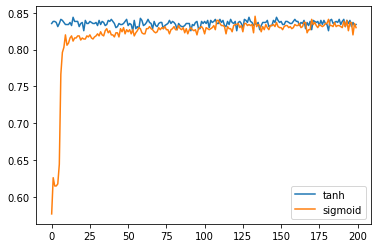

In [61]:
accuracy_df.plot()

Tanh activation function performed better than sigmoid on this dataset.